# Importing necessary Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import model_selection
from sklearn import preprocessing
from tsquared import HotellingT2
from sklearn.decomposition import PCA
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from scipy.stats import f

%matplotlib inline

# Reading the dataset

In [2]:
dat = pd.read_csv('seeds.csv')
dat

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
dat.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [4]:
# Converting the pandas dataframe into a 2-D numpy array
dat_np = np.array(dat)

In [5]:
dat_np.shape
# We can see the same dataframe row and column dimensions preserved as shown below

(199, 8)

In [6]:
# Scaling the input data
X_scaled = preprocessing.scale(dat_np[:,:7])
X_scaled.shape

(199, 7)

# Q2.a - Find the trace of Λ

In [7]:
# Finding the sample covariance matrix
n = dat_np.shape[0]
# Manual sample covariance matrix without mean shifting
S = (dat_np[:,:7].T.dot(dat_np[:,:7]))/(n-1)
# Sample covariance matrix with mean shifting
cov_mat = np.cov(X_scaled.T)

# Computing the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov_mat)
eigvals = np.diag(eigvals)
#eigvecs = eigvecs.reshape(-1,1)

print("Eigen values are:\n\n", eigvals)
print("\n")
print("Eigen vectors are:\n\n", eigvecs)

Eigen values are:

 [[5.05691778e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.20519035e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.79631565e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.85475795e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.89074688e-02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.16380060e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 5.34241202e-03]]


Eigen vectors are:

 [[ 0.44444526  0.0268951  -0.02541939  0.19763627  0.19751625 -0.73412145
  -0.42905925]
 [ 0.44156742  0.08298812  0.06019769  0.30034829  0.16637062  0.67153918
  -0.47503082]
 [ 0.277

In [8]:
# Checking the shapes of the eigenvalues and the eigenvectors
print("The shape of the eigenvalues diagonal matrix is:",eigvals.shape)
print("The shape of the eigenvectors matrix is:", eigvecs.shape)

The shape of the eigenvalues diagonal matrix is: (7, 7)
The shape of the eigenvectors matrix is: (7, 7)


In [9]:
# Trace of the lambda matrix is:
print("The trace of the eigen values matrix is:", np.trace(eigvals))

The trace of the eigen values matrix is: 7.035353535353538


# Q2.b - Find the basic statistics (mean and standard deviation) for the all the types of seeds

In [10]:
print("Printing MEANs of each input feature by seed types:")
seed_type = dat.groupby('Type')
seed_type.mean().transpose()

Printing MEANs of each input feature by seed types:


Type,1,2,3
Area,14.354394,18.370147,11.881077
Perimeter,14.306818,16.156912,13.256154
Compactness,0.879892,0.882965,0.848874
Kernel.Length,5.513000,6.157838,5.236862
Kernel.Width,3.247485,3.678647,2.851677
Asymmetry.Coeff,2.690670,3.657250,4.767185
Kernel.Groove,5.087197,6.026515,5.125415


In [11]:
print("Printing STANDARD DEVIATIONS of each input feature by seed types:")
seed_type = dat.groupby('Type')
seed_type.std().transpose()

Printing STANDARD DEVIATIONS of each input feature by seed types:


Type,1,2,3
Area,1.178117,1.413670,0.720822
Perimeter,0.559209,0.599224,0.347975
Compactness,0.016349,0.015371,0.020807
Kernel.Length,0.228527,0.259336,0.136917
Kernel.Width,0.173251,0.185824,0.143343
Asymmetry.Coeff,1.198981,1.195293,1.237093
Kernel.Groove,0.259822,0.246663,0.160033


# Q2.c - Split the data into training and test data (80:20) and calculate the T^2 statistic

In [12]:
X = dat_np[:,:7]
Y = dat_np[:,-1]

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [13]:
# Checking the array shapes of the split data
print("x_train's shape:", x_train.shape)
print("y_train's shape:", y_train.shape)
print("x_test's shape:", x_test.shape)
print("y_test's shape:", y_test.shape)

x_train's shape: (159, 7)
y_train's shape: (159, 1)
x_test's shape: (40, 7)
y_test's shape: (40, 1)


In [14]:
# Scaling the training and the test data separately
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

In [15]:
# Eigenvalue decomposition
cov_mat_train = np.cov(x_train_scaled.T)
eigvals_train_scaled, eigvecs_train_scaled = np.linalg.eig(cov_mat_train)

# Sort eigenvalues and eigenvectors in descending order
eigvals_train_indices = np.argsort(eigvals_train_scaled)[::-1]
eigvals_train_sorted = eigvals_train_scaled[eigvals_train_indices]
eigvecs_train_sorted = eigvecs_train_scaled[:, eigvals_train_indices]

lambda_train_scaled = np.diag(eigvals_train_sorted)

print("Diagonal matrix of eigenvalues (Lambda):\n", np.round(lambda_train_scaled,2))
print("\n")

# Print the eigenvalues and eigenvectors
for i in range(len(eigvals_train_sorted)):
    print("Eigenvalue", i+1, ":", eigvals_train_sorted[i])
    print("Eigenvector", i+1, ":", eigvecs_train_sorted[:, i])
    print()

Diagonal matrix of eigenvalues (Lambda):
 [[5.06 0.   0.   0.   0.   0.   0.  ]
 [0.   1.22 0.   0.   0.   0.   0.  ]
 [0.   0.   0.66 0.   0.   0.   0.  ]
 [0.   0.   0.   0.07 0.   0.   0.  ]
 [0.   0.   0.   0.   0.02 0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]


Eigenvalue 1 : 5.0616017684436505
Eigenvector 1 : [ 0.44440222  0.44148671  0.27846524  0.42576754  0.43325112 -0.12320394
  0.38195487]

Eigenvalue 2 : 1.2203678507402318
Eigenvector 2 : [ 0.02978046  0.08300594 -0.52465338  0.19378946 -0.11344396  0.71448362
  0.39503321]

Eigenvalue 3 : 0.6623534238935319
Eigenvector 3 : [-0.02488146  0.0613306  -0.63413364  0.20191396 -0.2112561  -0.67935876
  0.21579452]

Eigenvalue 4 : 0.07376766544216427
Eigenvector 4 : [ 0.2030799   0.30216001 -0.36231727  0.22243039  0.22468262  0.1030365
 -0.79095511]

Eigenvalue 5 : 0.019554429896357042
Eigenvector 5 : [ 0.1805387   0.14487001 -0.30149014 -0.77615235  0.47775963 -0.04320036
  0.15162174

In [16]:
# Calculating the T^2 statistic as T^2 = Z.T.dot(Z)
Z = ((np.linalg.inv(np.sqrt(lambda_train_scaled))).dot(eigvecs_train_sorted.T)).dot(x_train_scaled.T)
T_squared = Z.T@Z
print("T_squared statistic calculated for each sample manually with array operations:\n\n", np.diag(T_squared),"\n\n")
print(np.diag(T_squared).shape[0],"T_squared scores")

T_squared statistic calculated for each sample manually with array operations:

 [ 9.20670525  4.41231858  5.04357688  3.07609455  1.45484681  8.44101252
  4.09760412  5.46926895  7.80615417  6.05723196  3.11357891  2.97873796
  5.1437081   6.27484444 13.99104358  7.49117401  3.77331298  6.60653898
 18.02025748  8.11899318  8.89878372 10.51290689  5.05747599  4.08888223
 12.96869851  5.98657603 14.99020383  5.66355799 10.32578109  3.45195012
  4.34538468  4.00622728 10.483485    7.13191566 14.69009929  4.85801982
  6.24901742  8.43019164 12.18589162  5.41060125 10.09944309  2.16707003
  5.07775544  2.88648341  4.23524077  2.39051938  5.10960759  7.98542957
  7.46960024  8.92464304  3.14192275 10.7013703   2.2713631   6.59173288
  2.13989746  3.5556654   3.86507774  4.46085357  5.62103977  3.15871399
  3.77144766  3.16280059 14.80506331  2.55117927  5.30615336 15.51022649
  7.96455013  4.07200106  6.32460785  8.75937472  2.88473248 18.79965709
  3.9272825   4.54293536  5.61970407  2.336

In [17]:
# Calculating T^2 statistic for each sample using library
clf = HotellingT2()
clf.fit(x_train_scaled)
train_t2_scores_scaled = clf.score_samples(x_train_scaled)
print(f"T_squared statistic calculated for each sample using library:\n\n {train_t2_scores_scaled}\n\n")
print(train_t2_scores_scaled.shape[0],"T_squared scores")

T_squared statistic calculated for each sample using library:

 [ 9.20670525  4.41231858  5.04357688  3.07609455  1.45484681  8.44101252
  4.09760412  5.46926895  7.80615417  6.05723196  3.11357891  2.97873796
  5.1437081   6.27484444 13.99104358  7.49117401  3.77331298  6.60653898
 18.02025748  8.11899318  8.89878372 10.51290689  5.05747599  4.08888223
 12.96869851  5.98657603 14.99020383  5.66355799 10.32578109  3.45195012
  4.34538468  4.00622728 10.483485    7.13191566 14.69009929  4.85801982
  6.24901742  8.43019164 12.18589162  5.41060125 10.09944309  2.16707003
  5.07775544  2.88648341  4.23524077  2.39051938  5.10960759  7.98542957
  7.46960024  8.92464304  3.14192275 10.7013703   2.2713631   6.59173288
  2.13989746  3.5556654   3.86507774  4.46085357  5.62103977  3.15871399
  3.77144766  3.16280059 14.80506331  2.55117927  5.30615336 15.51022649
  7.96455013  4.07200106  6.32460785  8.75937472  2.88473248 18.79965709
  3.9272825   4.54293536  5.61970407  2.3362702   5.4917328 

# Q2.d - Perform PCA and visualize the explained variance ratio for the training set

In [18]:
# Checking variance explained and cumulative variance per principal component
variance_explained_pc = [lambda_train_scaled[v][v]/np.trace(lambda_train_scaled) for v in range(lambda_train_scaled.shape[0])]
variance_accumulated_pc = np.cumsum(variance_explained_pc)

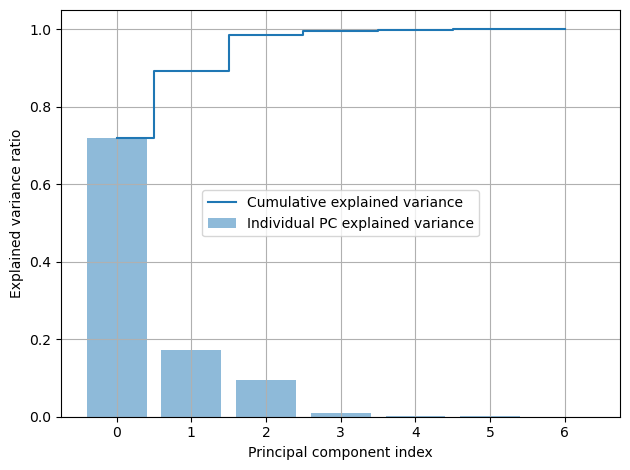

In [19]:
# Plotting variance explained ratio vs cumulative variance ratio
plt.bar(range(0,len(variance_explained_pc)), variance_explained_pc, alpha=0.5, align='center', label='Individual PC explained variance')
plt.step(range(0,len(variance_accumulated_pc)), variance_accumulated_pc, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center')
plt.grid()
plt.tight_layout()
plt.show()

# Q2.e - Find the T2 statistic threshold for the training data with 90% confidence interval using PCA representation


Based on the variance analysis done above we will use the first 2 principal components and their corresponding loading and scores to resconstruct the training input data

In [20]:
# Calculating Principal Components
PCs = eigvecs_train_sorted[:,:2].T@x_train_scaled.T

# Level of Significance
alpha = 0.1

# T^2 threshold with known covariance or chi^2 distribution
T2_threshold_chi2 = chi2.ppf(1-alpha, df=PCs.shape[0])

# T^2 threshold with unknown covariance or f distribution
dfn = 2  # Degrees of freedom numerator
dfd = PCs.shape[-1] - dfn  # Degrees of freedom denominator
f_critical_value = f.ppf(1 - alpha, dfn, dfd)
print("Critical value F_alpha(a, n-a):", f_critical_value)
print("\n")
n = PCs.shape[-1]
a = 2
T2_threshold_f = ((a*(n-1)*(n+1))/(n*(n-a)))*f_critical_value

print("T^2 threshold for with chi^2 distribution:", T2_threshold_chi2)
print("T^2 threshold for with f distribution:", T2_threshold_f)

Critical value F_alpha(a, n-a): 2.3366877645565762


T^2 threshold for with chi^2 distribution: 4.605170185988092
T^2 threshold for with f distribution: 4.732721763248828


# Q2.f -  Report whether there are faults in the test data and outliers in the training set

In [21]:
# Before performing fault detection we need to check if there are any outliers using f-distribution and the outlier formula:

alpha = 0.1  # Significance level
# Calculate F_alpha(a, n-a-1)
f_alpha = f.ppf(alpha, a, n-a-1)

# Calculate T^2 statistic
outlier_threshold= ((n-1)**2*(a/(n-a-1))*f_alpha)/(n*(1+(a/(n-a-1))))
print("Outliers threshold is:", outlier_threshold)

Outliers threshold is: 0.2095372288638188


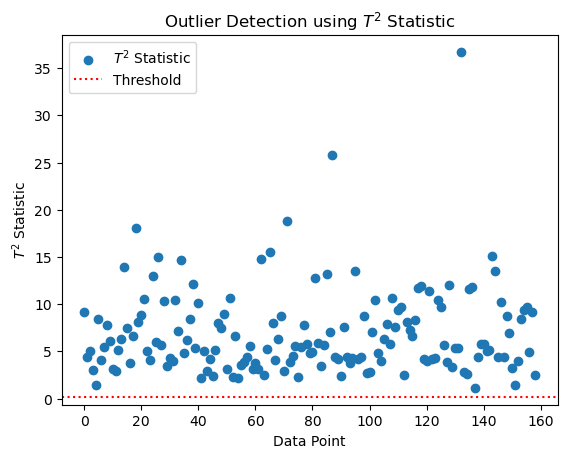

In [22]:
# Create a scatter plot of the T^2 statistic values
plt.scatter(range(len(train_t2_scores_scaled)), train_t2_scores_scaled, label='$T^2$ Statistic')

# Plot the threshold as a dotted line
plt.axhline(y=outlier_threshold, linestyle='dotted', color='red', label='Threshold')

# Add labels and title to the plot
plt.xlabel('Data Point')
plt.ylabel('$T^2$ Statistic')
plt.title('Outlier Detection using $T^2$ Statistic')

# Add a legend
plt.legend()

# Show the plot
plt.show()


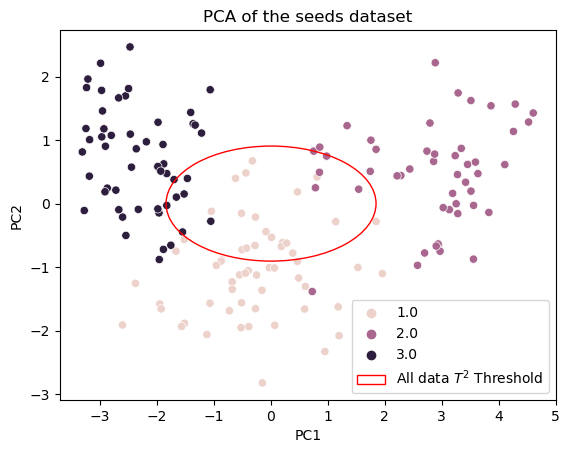

In [23]:
# Creating a scatter plot of the transformed data
sns.scatterplot(x=PCs[0, :].T, y=PCs[1, :].T, hue=y_train.reshape(-1,))

# Adding the T2 threshold ellipse for class 3 data
ellipse = Ellipse(xy=np.mean(PCs.T, axis=0), width=2 * np.sqrt(T2_threshold_f) * np.sqrt(variance_explained_pc[0]),
                  height=2 * np.sqrt(T2_threshold_f) * np.sqrt(variance_explained_pc[1]), edgecolor='red', facecolor='none',
                  label='All data $T^2$ Threshold')

# Adding the ellipse to the plot
plt.gca().add_patch(ellipse)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of the seeds dataset')
plt.legend()

# Show the plot
plt.show()

In [24]:
# Removing outliers from the x_train_scaled input dataset

inlier_indices = [i for i in range(train_t2_scores_scaled.shape[0]) if train_t2_scores_scaled[i]>outlier_threshold]
x_train_scaled_upd = x_train_scaled[inlier_indices, :]

In [25]:
# Test data calculating the T^2 statistic as T^2 = Z.T.dot(Z)
Z_test = ((np.linalg.inv(np.sqrt(lambda_train_scaled[:2,:2]))).dot(eigvecs_train_sorted[:, :2].T)).dot(x_test_scaled.T)
T_squared_test = np.diag(Z_test.T@Z_test)
print("T_squared statistic calculated for each sample manually with array operations:\n\n", T_squared_test,"\n\n")
print(T_squared_test.shape[0],"T_squared scores")

T_squared statistic calculated for each sample manually with array operations:

 [2.41487063 1.23045947 1.11660269 3.38426444 1.20652622 3.94618843
 0.6726517  1.24919906 1.22036254 1.27646429 2.36905368 1.81639422
 0.90147638 0.15519918 2.49823313 3.58859271 5.67283272 0.56495362
 5.94175084 3.268976   4.94207168 0.48414838 0.08581668 0.90800155
 1.26707297 0.77750583 2.04268871 0.13064879 1.04637486 0.49294857
 3.71032454 1.14167543 2.25557014 3.16432415 1.46748359 2.03147293
 1.44654863 2.15980472 0.66927909 3.00801486] 


40 T_squared scores


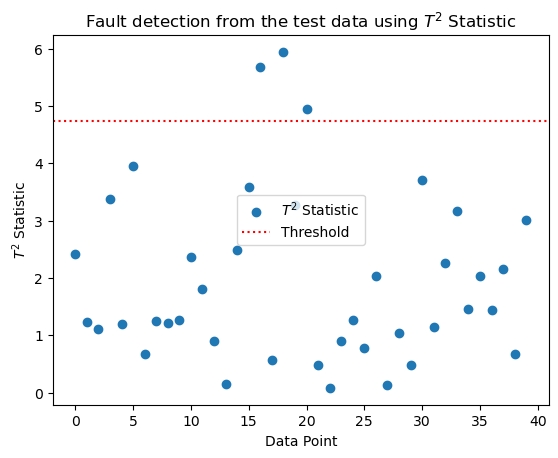

In [26]:
# Create a scatter plot of the T^2 statistic values
plt.scatter(range(len(T_squared_test)), T_squared_test, label='$T^2$ Statistic')

# Plot the threshold as a dotted line
plt.axhline(y=T2_threshold_f, linestyle='dotted', color='red', label='Threshold')

# Add labels and title to the plot
plt.xlabel('Data Point')
plt.ylabel('$T^2$ Statistic')
plt.title('Fault detection from the test data using $T^2$ Statistic')

# Add a legend
plt.legend(loc='center')

# Show the plot
plt.show()